<a href="https://colab.research.google.com/github/wrodemoyer/Adult-Income/blob/main/Adult_Income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Adult Income

## Overview

- An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, and etc.

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

## Models
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression


# Classification Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, ConfusionMatrixDisplay, RocCurveDisplay, roc_auc_score


## Set global scikit-learn configuration 
from sklearn import set_config
## Display estimators as a diagram
set_config(display='diagram') # 'text' or 'diagram'}

## Load and Inspect Data

In [2]:
df= pd.read_csv('/content/drive/MyDrive/Data/adult.csv')

### .head( )

In [3]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


### .info( )

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


### .shape

In [5]:
df.shape

(48842, 15)

- We have 48842 rows, and 15 columns.

## Clean the Data

### Remove Unnecessary Rows

#### Duplicates

In [6]:
df.duplicated().sum()

52

- We have 52 duplicates. 

In [7]:
# Drop Duplicates
df.drop_duplicates(inplace=True)

df.duplicated().sum()

0

- There are now zero duplicates.

#### Missing Values

In [8]:
# Display Total Number of Missing Values
print(f'There are {df.isna().sum().sum()} missing values.')

There are 0 missing values.


- We dont need to address this. There are no missing values. 

In [9]:
# Checking Data Types
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [10]:
df.nunique()

age                   74
workclass              9
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            15
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        42
income                 2
dtype: int64

### Numeric Columns

In [11]:
# Check for Any Impossible Values in Numeric Column(s)
df.describe(include='number')

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48790.000000,4.879000e+04,48790.000000,48790.000000,48790.000000,48790.000000
mean,38.652798,1.896690e+05,10.078807,1080.217688,87.595573,40.425886
std,13.708493,1.056172e+05,2.570046,7455.905921,403.209129,12.392729
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175550e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781385e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376062e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


- No issues noted.

### Categorical Columns

In [12]:
# Check for Any Inconsistent Values in Categorical Columns
df.describe(include='object')

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,48790,48790,48790,48790,48790,48790,48790,48790,48790
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33860,15770,22366,6165,19703,41714,32614,43792,37109


In [13]:
df['workclass'].value_counts()

Private             33860
Self-emp-not-inc     3861
Local-gov            3136
?                    2795
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [14]:
# Changing the name of the value '?'
df['workclass'].replace('?', 'Unknown', inplace=True)
df['workclass'].value_counts()

Private             33860
Self-emp-not-inc     3861
Local-gov            3136
Unknown              2795
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

- '?' Value is now known as 'Unknown'

In [15]:
df['education'].value_counts()

HS-grad         15770
Some-college    10863
Bachelors        8013
Masters          2656
Assoc-voc        2060
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           954
Prof-school       834
9th               756
12th              655
Doctorate         594
5th-6th           507
1st-4th           245
Preschool          81
Name: education, dtype: int64

- No issues noted

In [16]:
df['marital-status'].value_counts()

Married-civ-spouse       22366
Never-married            16082
Divorced                  6630
Separated                 1530
Widowed                   1518
Married-spouse-absent      627
Married-AF-spouse           37
Name: marital-status, dtype: int64

- No issues noted

In [17]:
df['occupation'].value_counts()

Prof-specialty       6165
Craft-repair         6102
Exec-managerial      6082
Adm-clerical         5606
Sales                5501
Other-service        4919
Machine-op-inspct    3017
?                    2805
Transport-moving     2355
Handlers-cleaners    2071
Farming-fishing      1485
Tech-support         1445
Protective-serv       982
Priv-house-serv       240
Armed-Forces           15
Name: occupation, dtype: int64

In [18]:
# Changing the name of the value '?'
df['occupation'].replace('?', 'Unknown', inplace=True)
df['occupation'].value_counts()

Prof-specialty       6165
Craft-repair         6102
Exec-managerial      6082
Adm-clerical         5606
Sales                5501
Other-service        4919
Machine-op-inspct    3017
Unknown              2805
Transport-moving     2355
Handlers-cleaners    2071
Farming-fishing      1485
Tech-support         1445
Protective-serv       982
Priv-house-serv       240
Armed-Forces           15
Name: occupation, dtype: int64

- '?' Value is now known as 'Unknown'

In [19]:
df['race'].value_counts()

White                 41714
Black                  4683
Asian-Pac-Islander     1517
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

- No issues noted

## Exploratory Data Analysis

### Univariates 

#### Categorical Features

##### Countplots

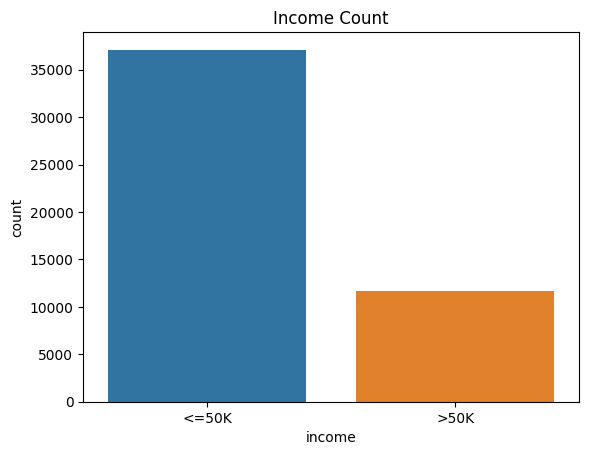

In [20]:
# Using a CountPlot to look at our Target ('income')
ax= sns.countplot(data= df, x = 'income')

ax.set_title('Income Count');

- Significantly more people have an income of <=50K than >50K.

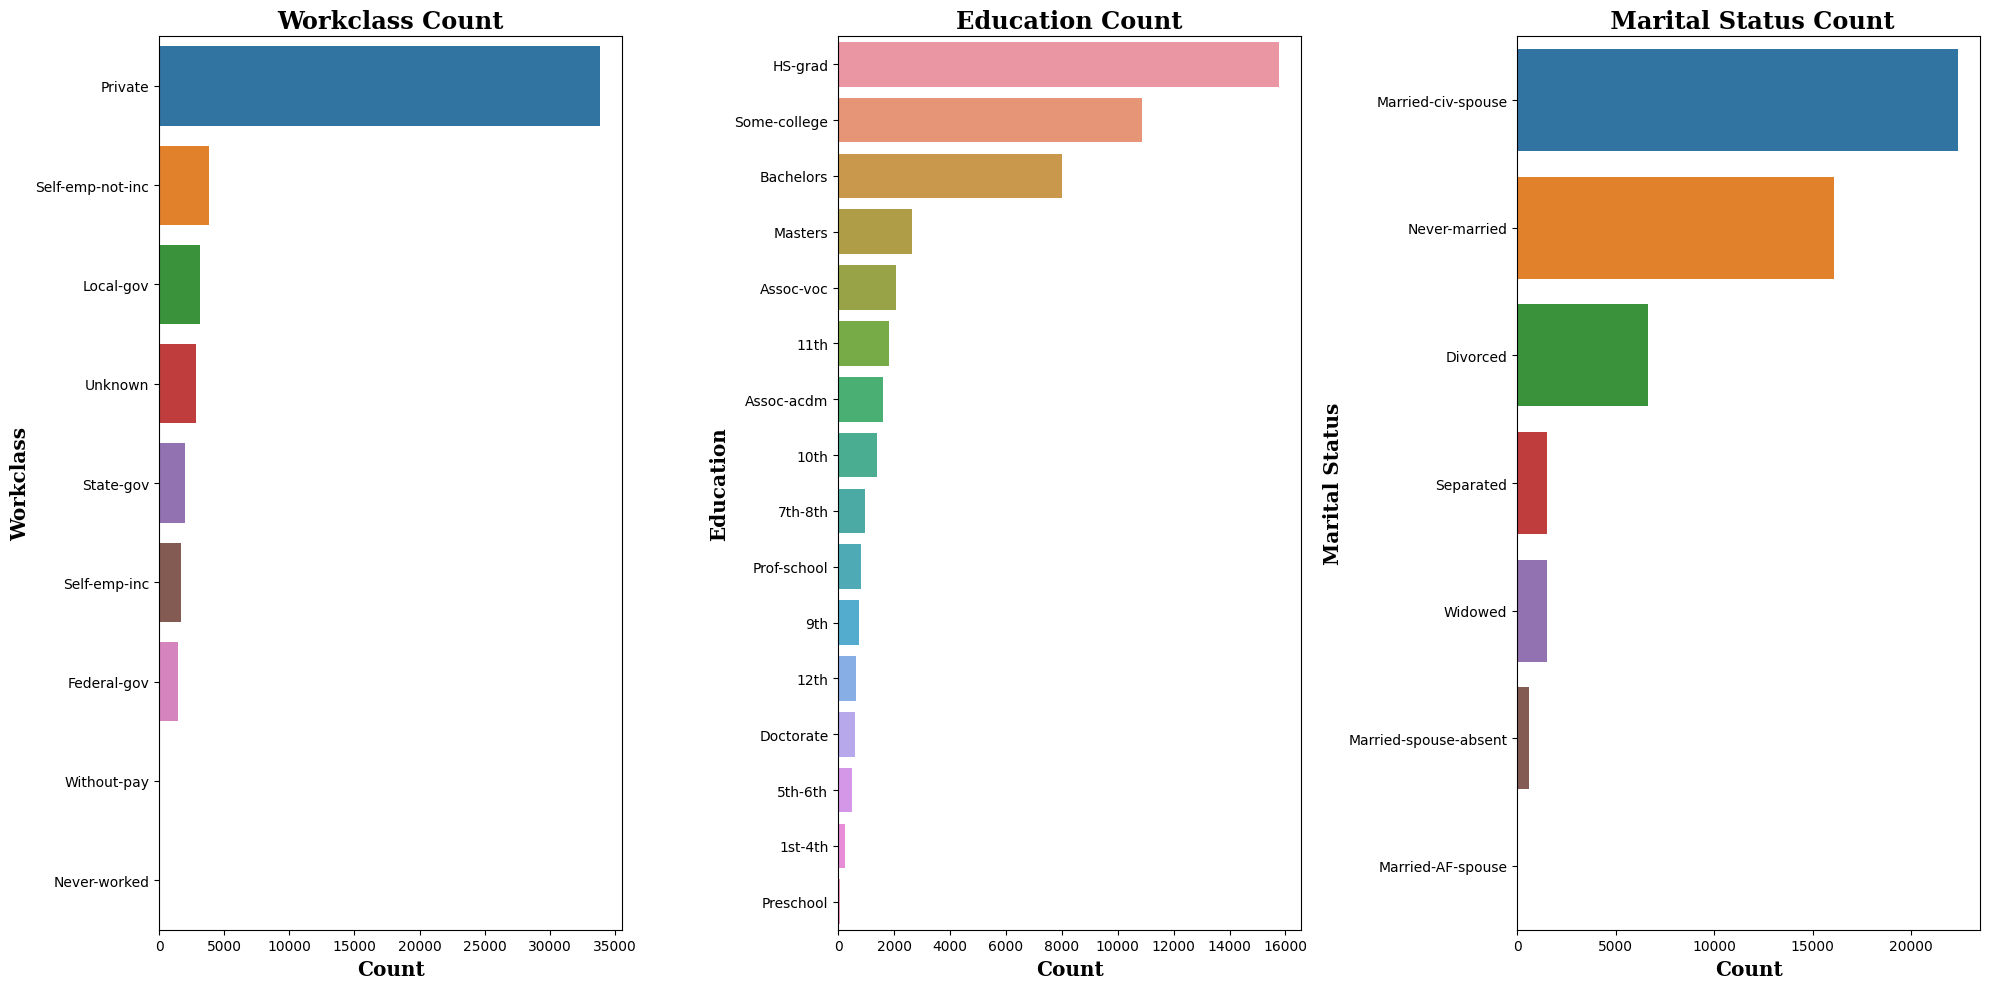

In [21]:
fig, axes = plt.subplots(ncols= 3, figsize= (20,10))
# workclass
axes[0]= sns.countplot(data=df, y= 'workclass', order= df['workclass'].value_counts().index, ax= axes[0])

axes[0].set_title('Workclass Count',
                  fontfamily='serif',
                  fontsize='xx-large',
                  fontweight='semibold')

axes[0].set_xlabel('Count',
                   fontfamily= 'serif',
                   fontsize= 'x-large',
                   fontweight= 'bold')

axes[0].set_ylabel('Workclass',
                   fontfamily= 'serif',
                   fontsize= 'x-large',
                   fontweight= 'bold')



# education 
axes[1]= sns.countplot(data=df, y= 'education', order= df['education'].value_counts().index, ax= axes[1])

axes[1].set_title('Education Count', 
                  fontfamily='serif',
                  fontsize='xx-large',
                  fontweight='semibold')

axes[1].set_xlabel('Count',
                   fontfamily= 'serif',
                   fontsize= 'x-large',
                   fontweight= 'bold')

axes[1].set_ylabel('Education',
                   fontfamily= 'serif',
                   fontsize= 'x-large',
                   fontweight= 'bold')


# martial status
axes[2]= sns.countplot(data=df, y= 'marital-status',order= df['marital-status'].value_counts().index, ax= axes[2])

axes[2].set_title(' Marital Status Count',
                  fontfamily='serif',
                  fontsize='xx-large',
                  fontweight='semibold')

axes[2].set_xlabel('Count',
                   fontfamily= 'serif',
                   fontsize= 'x-large',
                   fontweight= 'bold')

axes[2].set_ylabel('Marital Status',
                   fontfamily= 'serif',
                   fontsize= 'x-large',
                   fontweight= 'bold')


plt.tight_layout();

- Workclass:
  - The value of 'Private' is by far the most dominant value in the workplace column.
- Education:
  - There is a fairly significant drop off after our top 3 values of 'HS-grad', 'Some-college' and 'Bachelors'. 
- Marital Status
  - Its pretty clear that 'Married-civ-spouse' and 'Never-married' are the most common values in the marital status column.

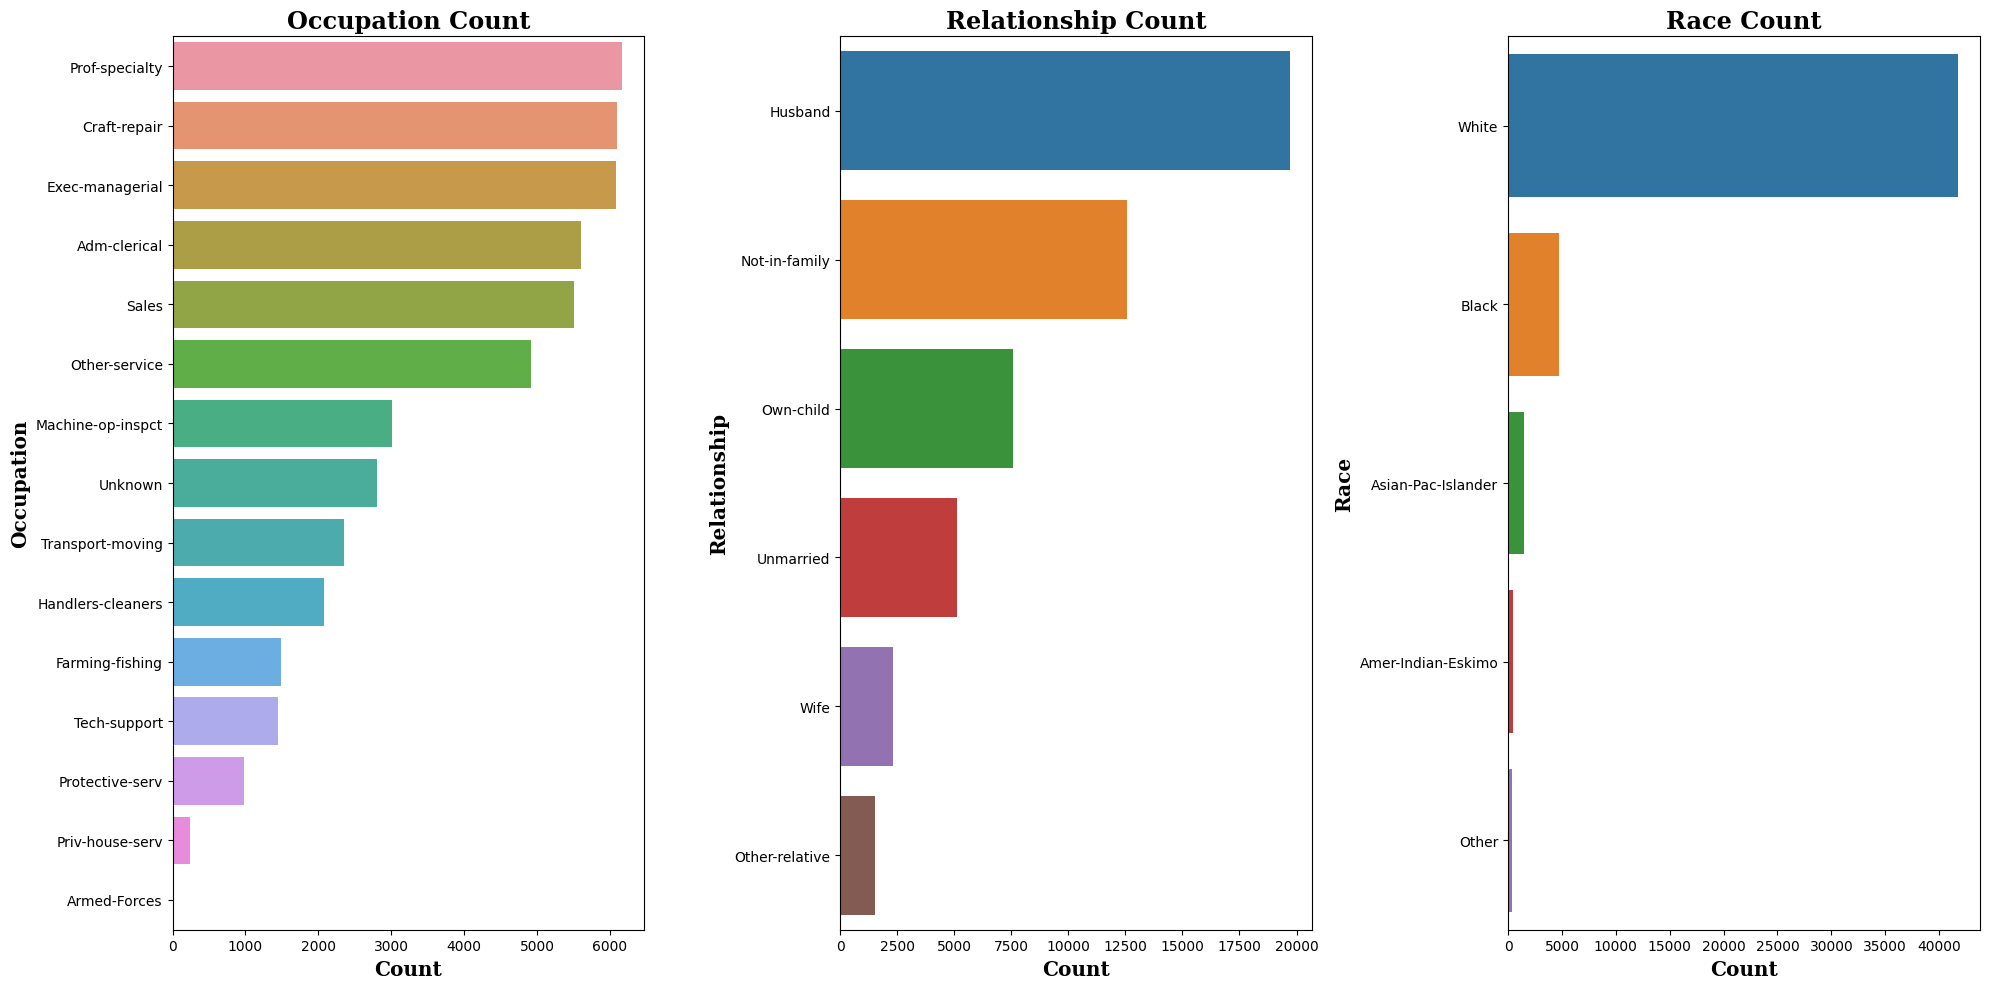

In [22]:
fig, axes = plt.subplots(ncols= 3, figsize= (20,10))
# occupation
axes[0]= sns.countplot(data=df, y= 'occupation', order= df['occupation'].value_counts().index, ax= axes[0])

axes[0].set_title('Occupation Count',
                  fontfamily='serif',
                  fontsize='xx-large',
                  fontweight='semibold')

axes[0].set_xlabel('Count',
                   fontfamily= 'serif',
                   fontsize= 'x-large',
                   fontweight= 'bold')

axes[0].set_ylabel('Occupation',
                   fontfamily= 'serif',
                   fontsize= 'x-large',
                   fontweight= 'bold')



# relationship
axes[1]= sns.countplot(data=df, y= 'relationship', order= df['relationship'].value_counts().index, ax= axes[1])

axes[1].set_title('Relationship Count', 
                  fontfamily='serif',
                  fontsize='xx-large',
                  fontweight='semibold')

axes[1].set_xlabel('Count',
                   fontfamily= 'serif',
                   fontsize= 'x-large',
                   fontweight= 'bold')

axes[1].set_ylabel('Relationship',
                   fontfamily= 'serif',
                   fontsize= 'x-large',
                   fontweight= 'bold')


# race
axes[2]= sns.countplot(data=df, y= 'race',order= df['race'].value_counts().index, ax= axes[2])

axes[2].set_title('Race Count',
                  fontfamily='serif',
                  fontsize='xx-large',
                  fontweight='semibold')

axes[2].set_xlabel('Count',
                   fontfamily= 'serif',
                   fontsize= 'x-large',
                   fontweight= 'bold')

axes[2].set_ylabel('Race',
                   fontfamily= 'serif',
                   fontsize= 'x-large',
                   fontweight= 'bold')


plt.tight_layout();

- Occupation
  - Compared to other columns, occupation is much more diverse. Value 'Prof-specialty' just edges 'Craft-repair' as the highest occupation value. 
- Relationship
  - Husband is clearly the most common value. 
- Race
  - The value 'White' dominates the 'Race' column. 

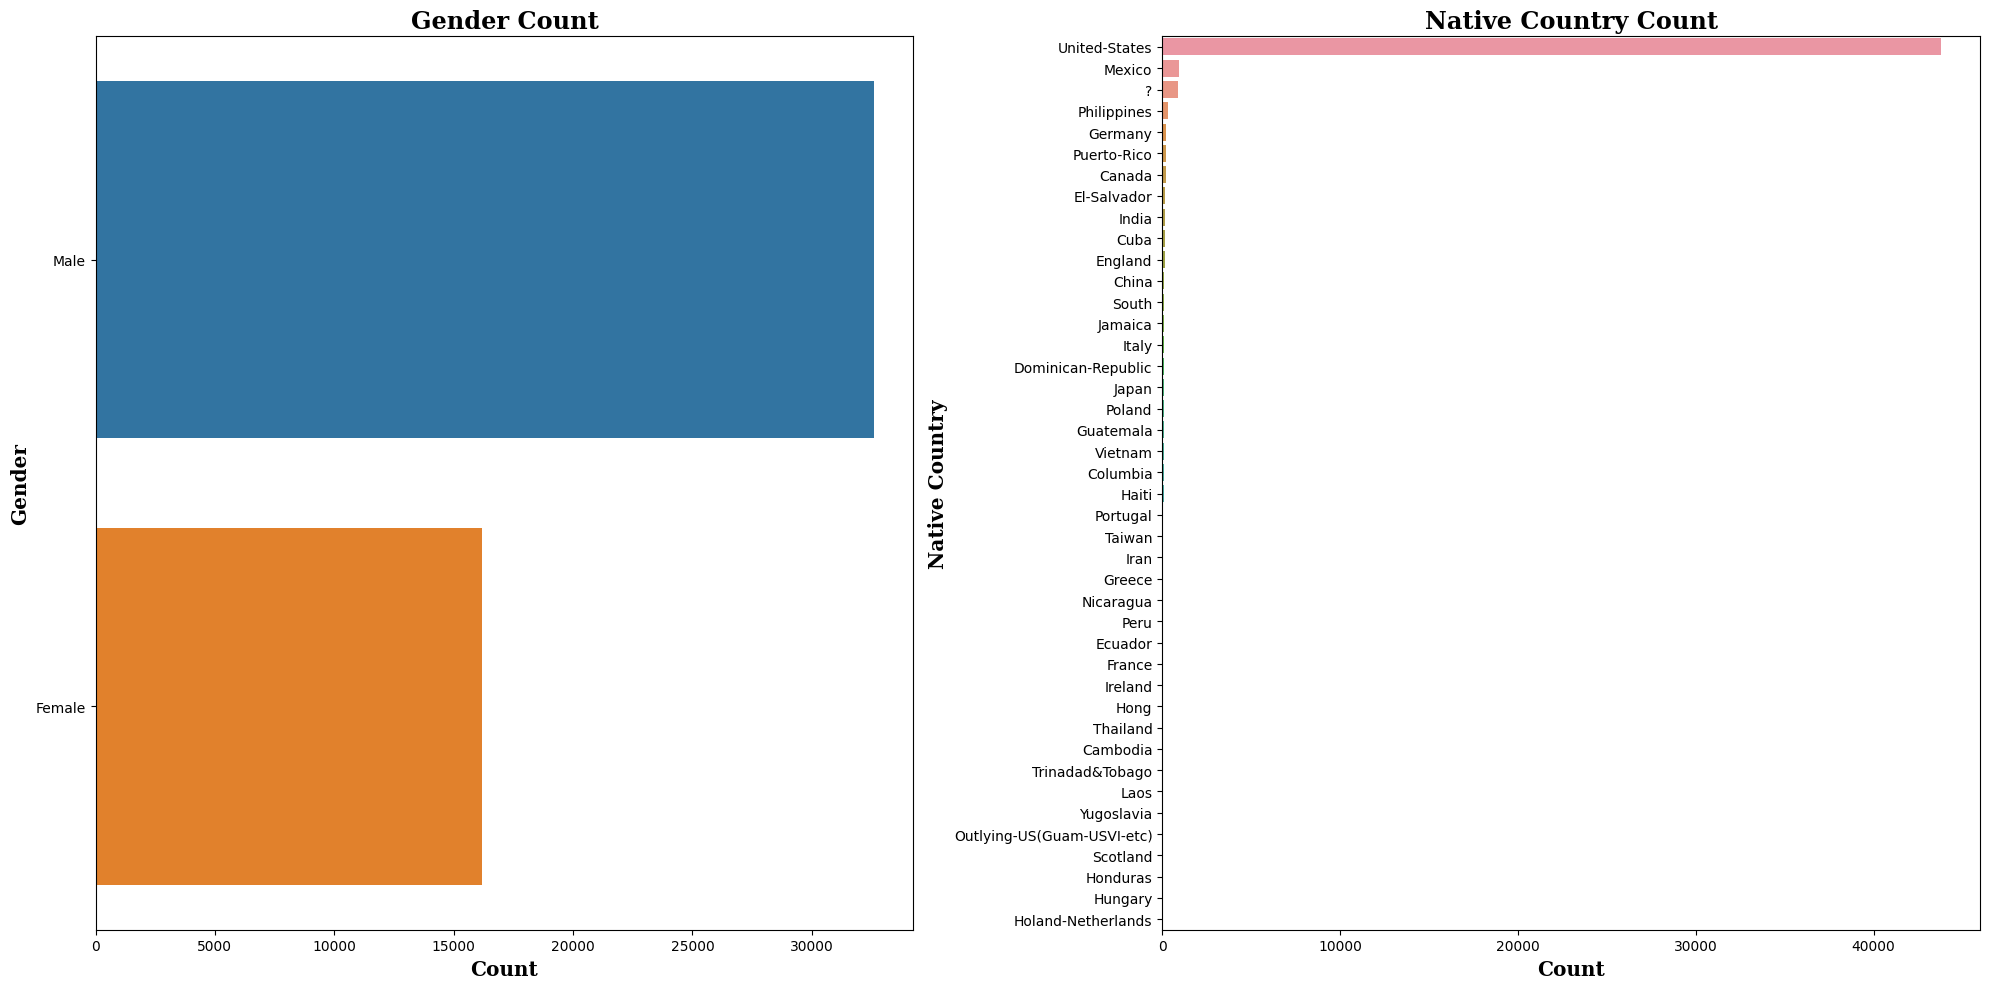

In [23]:
fig, axes = plt.subplots(ncols= 2, figsize= (20,10))
# gender
axes[0]= sns.countplot(data=df, y= 'gender', order= df['gender'].value_counts().index, ax= axes[0])

axes[0].set_title('Gender Count',
                  fontfamily='serif',
                  fontsize='xx-large',
                  fontweight='semibold')

axes[0].set_xlabel('Count',
                   fontfamily= 'serif',
                   fontsize= 'x-large',
                   fontweight= 'bold')

axes[0].set_ylabel('Gender',
                   fontfamily= 'serif',
                   fontsize= 'x-large',
                   fontweight= 'bold')



# native-country
axes[1]= sns.countplot(data=df, y= 'native-country', order= df['native-country'].value_counts().index, ax= axes[1])

axes[1].set_title('Native Country Count', 
                  fontfamily='serif',
                  fontsize='xx-large',
                  fontweight='semibold')

axes[1].set_xlabel('Count',
                   fontfamily= 'serif',
                   fontsize= 'x-large',
                   fontweight= 'bold')

axes[1].set_ylabel('Native Country',
                   fontfamily= 'serif',
                   fontsize= 'x-large',
                   fontweight= 'bold')

plt.tight_layout();

- Gender
  - Male looks to double the value of Female.
- Native Country
  - United States clearly dominates the native country column. Clearly our most unique column in regards to number of different value. 

#### Numeric Features

In [24]:
df.describe(include='number')

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48790.000000,4.879000e+04,48790.000000,48790.000000,48790.000000,48790.000000
mean,38.652798,1.896690e+05,10.078807,1080.217688,87.595573,40.425886
std,13.708493,1.056172e+05,2.570046,7455.905921,403.209129,12.392729
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175550e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781385e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376062e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


##### Histograms

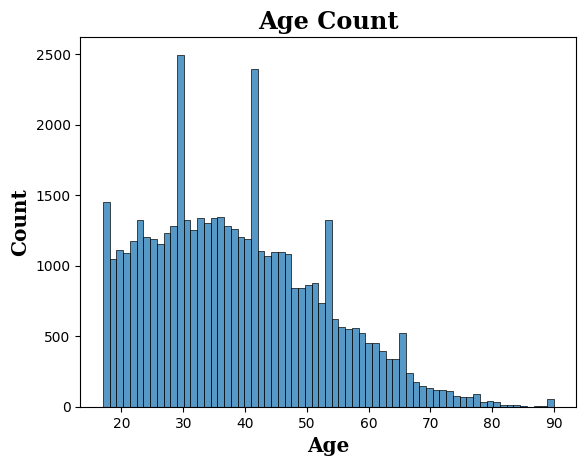

In [25]:
# age
ax= sns.histplot(data=df, x= 'age',)

ax.set_title('Age Count',
                  fontfamily='serif',
                  fontsize='xx-large',
                  fontweight='semibold')

ax.set_xlabel('Age',
                   fontfamily= 'serif',
                   fontsize= 'x-large',
                   fontweight= 'bold')

ax.set_ylabel('Count',
                   fontfamily= 'serif',
                   fontsize= 'x-large',
                   fontweight= 'bold');


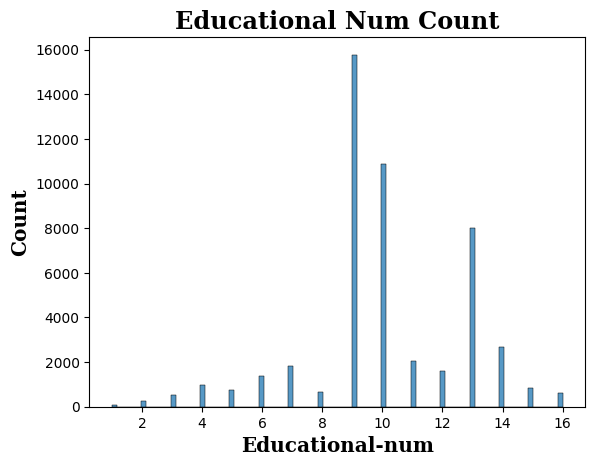

In [26]:
# educational num
ax= sns.histplot(data=df, x= 'educational-num',)

ax.set_title('Educational Num Count',
                  fontfamily='serif',
                  fontsize='xx-large',
                  fontweight='semibold')

ax.set_xlabel('Educational-num',
                   fontfamily= 'serif',
                   fontsize= 'x-large',
                   fontweight= 'bold')

ax.set_ylabel('Count',
                   fontfamily= 'serif',
                   fontsize= 'x-large',
                   fontweight= 'bold');


##### Boxplots

Text(0.5, 1.0, 'FNLWGT')

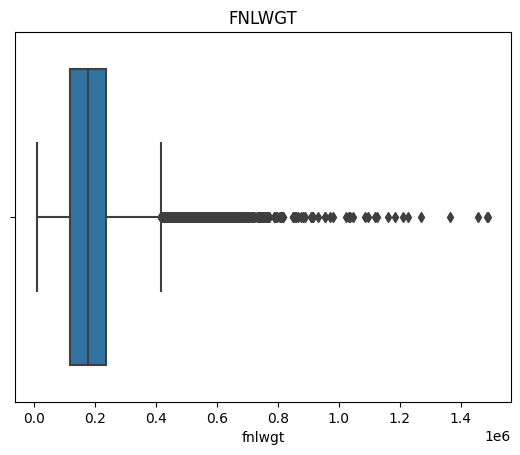

In [27]:
# fnlwgt
ax = sns.boxplot(data = df,
                 x = 'fnlwgt')
ax.set_title('FNLWGT')

- fnlwgt column has quite a few outliers. 

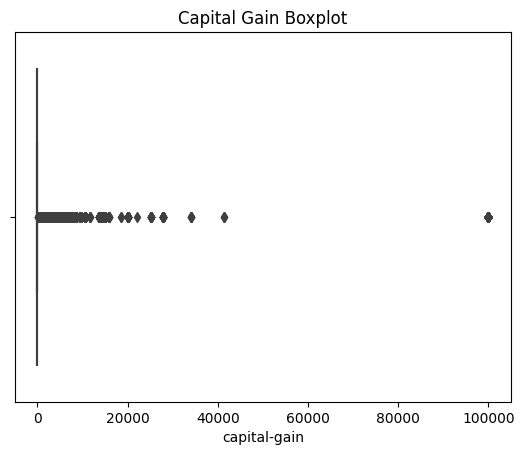

In [28]:
# capital-gain
ax= sns.boxplot(data=df,
                x= 'capital-gain')

ax.set_title('Capital Gain Boxplot');

- We have a very noticable outlier just under 100,000.

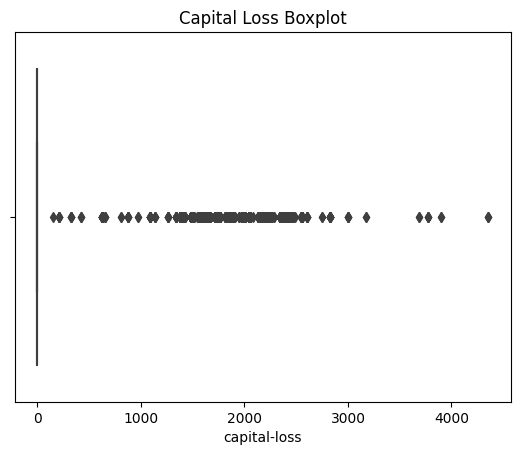

In [29]:
# capital-loss	
ax= sns.boxplot(data=df,
                x= 'capital-loss')

ax.set_title('Capital Loss Boxplot');

- Similar looking the capital-gain. Most values sit at 0 with some outliers. 

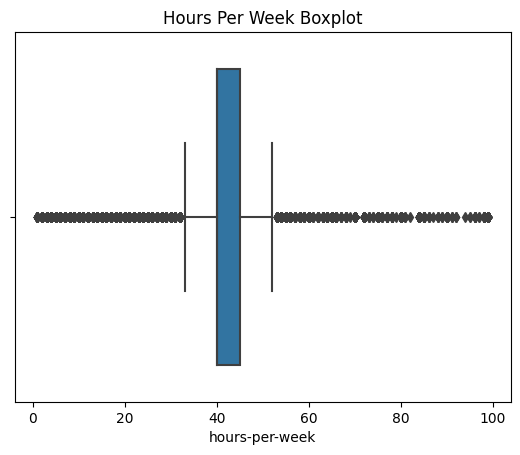

In [30]:
# hours-per-week
ax= sns.boxplot(data=df,
                x= 'hours-per-week')

ax.set_title('Hours Per Week Boxplot');

- Most values are around 40 hours per week.

### Multivariates

#### Heatmap

<ipython-input-31-f9348146c466>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


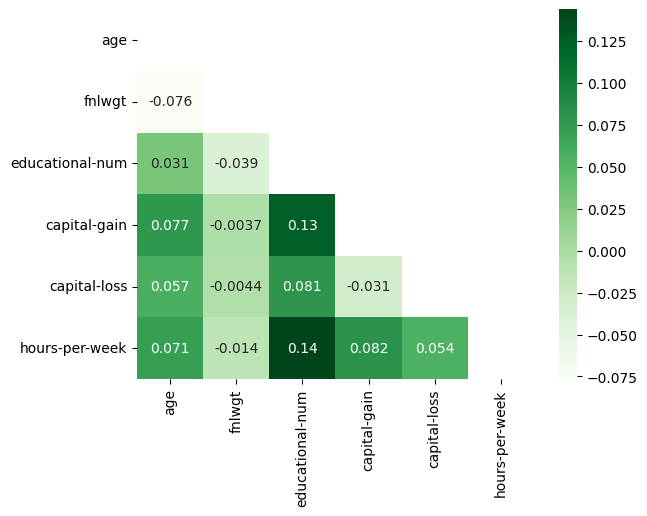

In [31]:
# Looking at the correlation between our columns
corr = df.corr()
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr, cmap= 'Greens', annot= True, mask= mask);

- We have various correlations between some of our features. 

- Strong Correlations
  - Positive Correlations
    - Our strongest overall correlation is between 'hours-per-week' and 'educational-num' with a 0.14.
    - 'capital-gain' and 'educational-num' also have a very strong correlation with 0.13.
  - Negative Correlations
    - We have a -0.076 correlation between 'fnlwgt' and 'age'. 

- Moderate Correlations

  *   'hours-per-week' and 'fnlwgt'
  *   'hours-per-week' and 'capital-loss-



#### Regplots

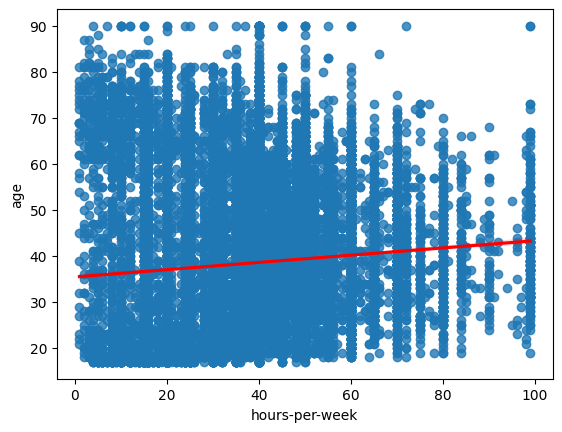

In [34]:
# Looking at the Relationship between hours per week and age. 
ax = sns.regplot(data= df, x= 'hours-per-week', y= 'age', line_kws={'color': 'red'});

- We have a positive correlation here, between hours per week and age. 
- On average, individuals who are older slightly work more hours per week.

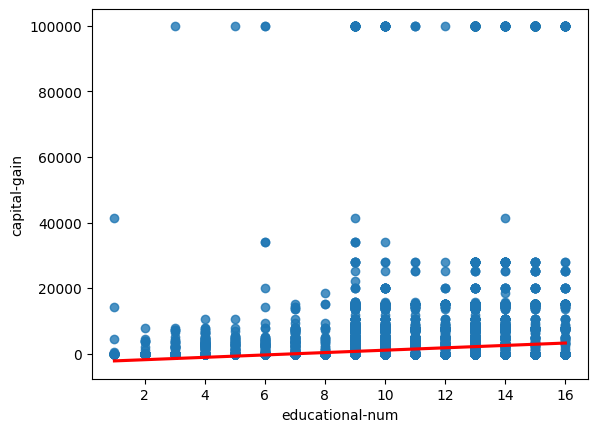

In [36]:
# Looking at educational num and capital gains relationship.

ax= sns.regplot(data=df, x= 'educational-num', y= 'capital-gain', line_kws= {'color': 'red'}); 

- We have a postisive relationship between our 2 features. 
- On average, higher the education, higher the capital gain. 

#### Barplots

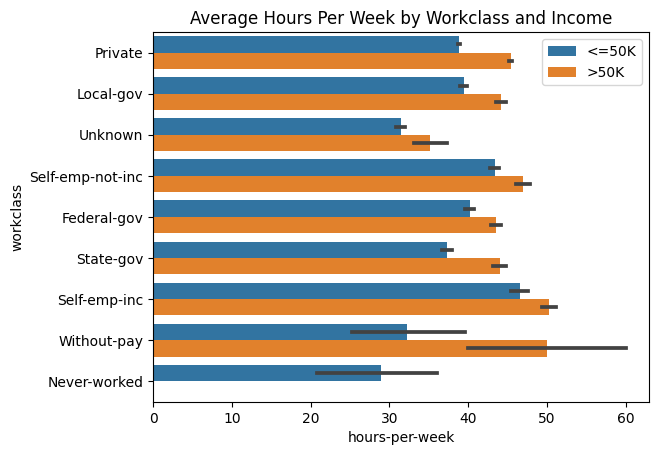

In [39]:
# Comparing workclass and hours per week

ax= sns.barplot(data=df, x= 'hours-per-week', y= 'workclass', hue= 'income')

# title
ax.set_title('Average Hours Per Week by Workclass and Income')

# legend location
ax.legend(loc= 'best');

### Observations

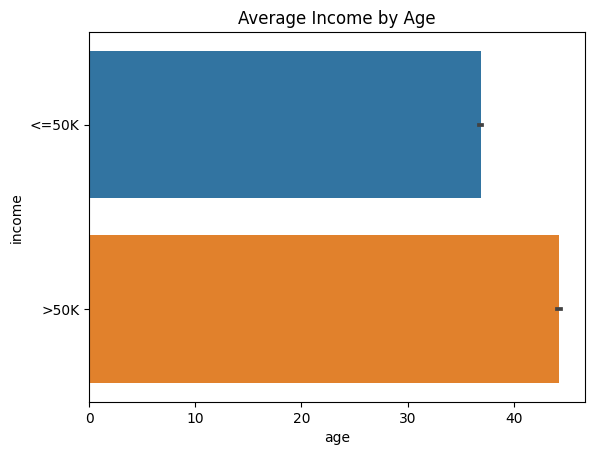

In [40]:
# comparing average income by age
ax= sns.barplot(data=df, x= 'age', y= 'income')

# title
ax.set_title('Average Income by Age');

- Of the individuals who make greater than 50k, are clearly older in age on average. 

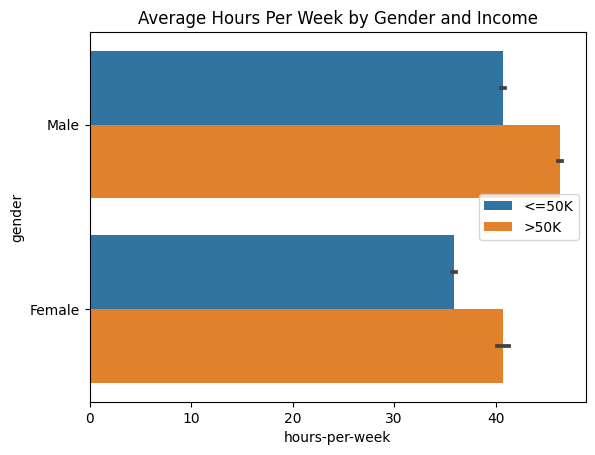

In [42]:

ax= sns.barplot(data=df, x= 'hours-per-week', y= 'gender', hue= 'income')

# title
ax.set_title('Average Hours Per Week by Gender and Income')

# legend location
ax.legend(loc= 'center right');

- Both Genders who make more than 50k, work more hours per week than those who make 50k or less.

- On average, males work more hours per week compared to females when comparing their respectable income categories. 